In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse  # 추정의 표준오차
%matplotlib inline

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import GridSearchCV   # cross validation(구버전)

In [3]:
df_raw = pd.read_csv("/home/pirl/Downloads/BigDataAnalysis/DIABETES.csv", engine="python")
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [75]:
# GENDER는 명목형 변수이지만 랜덤 포레스트는 포함시킨다.

df_raw_y = df_raw["Y"]
df_raw_x = df_raw.drop("Y", axis = 1, inplace= False)
df_train_x, df_test_x, df_train_y, df_test_y= train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1111111)

In [76]:
#p.193  65    2 9786  97865  9  243  35  
rf_uncustomized = RFR(random_state = 1111111)
rf_uncustomized.fit(df_train_x,df_train_y)

print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on training set: 0.895
Score on test set: 0.443


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [77]:
# 랜덤 포레스트 - 모델 parameter 조정
train_score = []; test_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1,21)]

for v_n_estimators in para_n_tree:
    rf = RFR(n_estimators=v_n_estimators, random_state=1111111)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

In [78]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.895,0.443
1,20,0.912,0.424
2,30,0.915,0.444
3,40,0.915,0.443
4,50,0.916,0.451
5,60,0.917,0.459
6,70,0.918,0.454
7,80,0.918,0.453
8,90,0.919,0.451
9,100,0.919,0.449


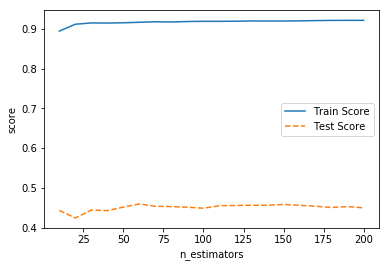

In [79]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [80]:
#p.196
train_score = []; test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RFR(n_estimators=150, random_state=1111111, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.920,0.458
1,2,0.888,0.450
2,3,0.842,0.448
3,4,0.797,0.447
4,5,0.760,0.444
5,6,0.728,0.444
6,7,0.700,0.447
7,8,0.681,0.451
8,9,0.665,0.450
9,10,0.649,0.448


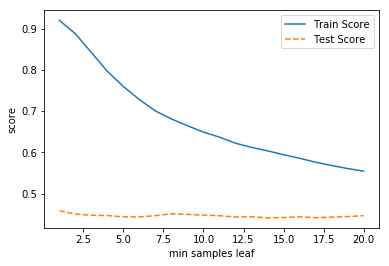

In [82]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [83]:
# p.198
# 

train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split :
    rf = RFR(n_estimators=150, random_state=1111111, min_samples_leaf = 7, min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_split= pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.700,0.447
1,6,0.700,0.447
2,8,0.700,0.447
3,10,0.700,0.447
4,12,0.700,0.447
5,14,0.700,0.447
6,16,0.690,0.445
7,18,0.679,0.444
8,20,0.668,0.443
9,22,0.659,0.443


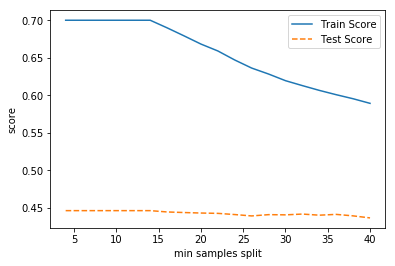

In [84]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [85]:
# p.200

train_score = []; test_score = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    rf = RFR(n_estimators=150, random_state=1111111, min_samples_leaf= 7, min_samples_split = 14, max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.396,0.378
1,2,0.511,0.442
2,3,0.586,0.445
3,4,0.640,0.444
4,5,0.675,0.446
5,6,0.691,0.445
6,7,0.698,0.446
7,8,0.700,0.447
8,9,0.700,0.447
9,10,0.700,0.447


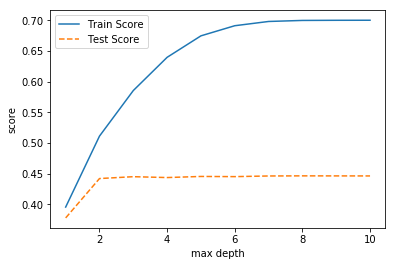

In [86]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [91]:
# 최종 모델 생성

rf_final = RFR(n_estimators=150, random_state=1111111, min_samples_leaf=7, min_samples_split = 14, max_depth = 3)
rf_final.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))
rf_final

Score on training set: 0.586
Score on test set: 0.445


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
           oob_score=False, random_state=1111111, verbose=0,
           warm_start=False)

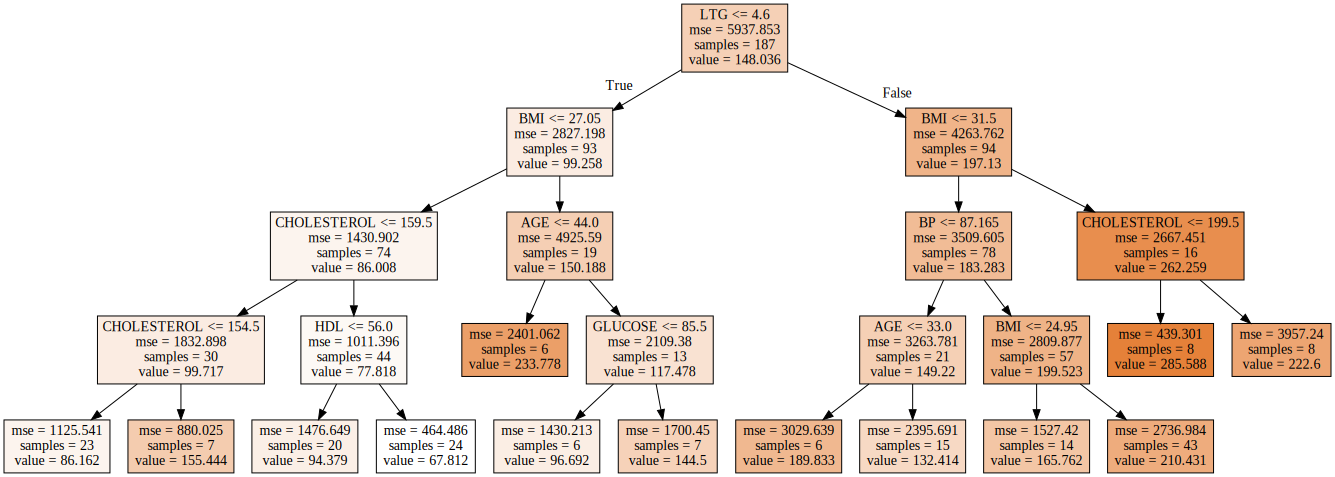

In [51]:
# p. 203
v_feature_name = df_train_x.columns
export_graphviz(rf_final.estimators_[0], out_file="rfr_final_0.dot",feature_names=v_feature_name, impurity=True, filled=True)

with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

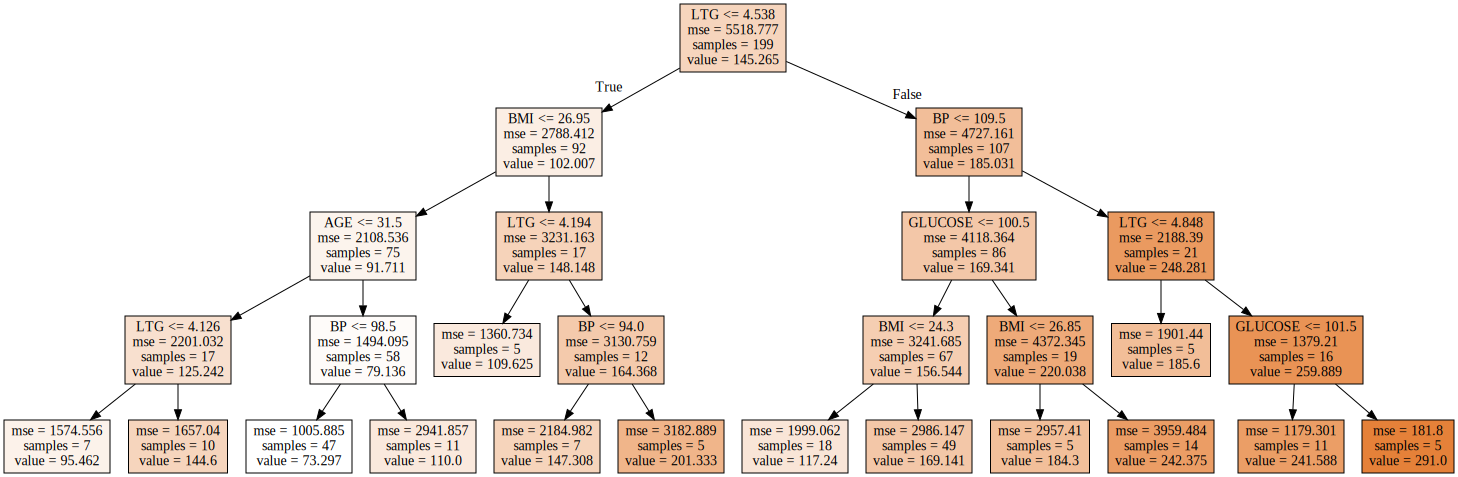

In [52]:
export_graphviz(rf_final.estimators_[1], out_file="rfr_final_1.dot",feature_names=v_feature_name, impurity=True, filled=True)

with open("rfr_final_1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

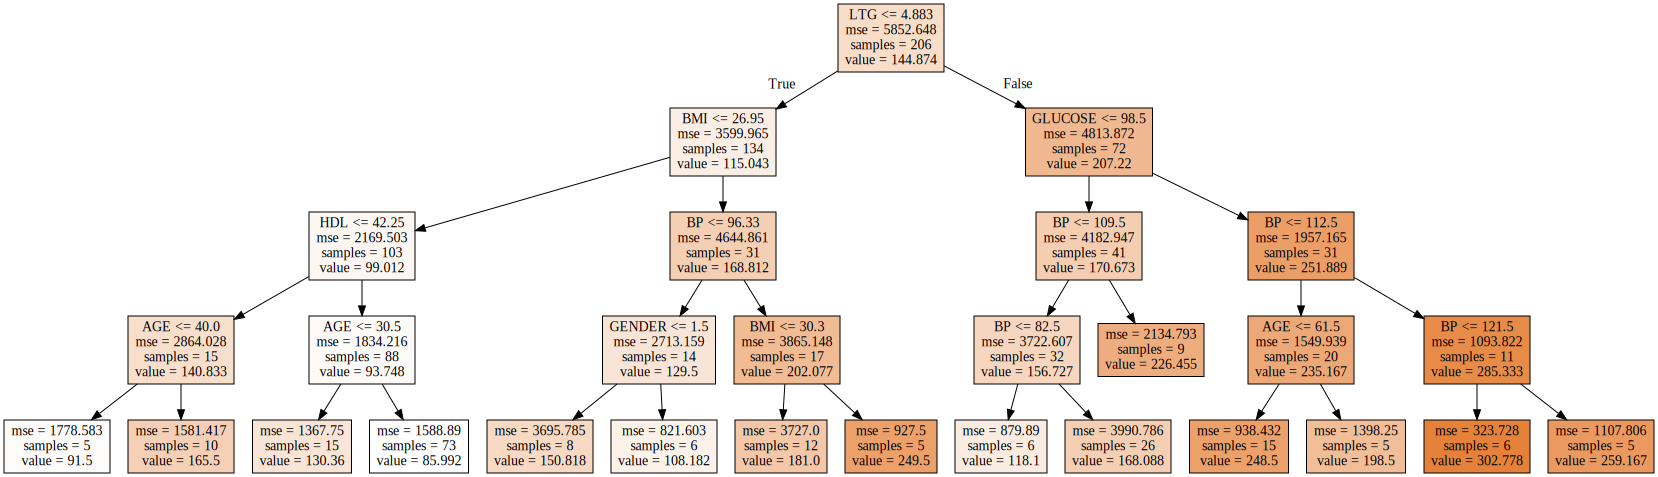

In [53]:
export_graphviz(rf_final.estimators_[10], out_file="rfr_final_10.dot",feature_names=v_feature_name, impurity=True, filled=True)

with open("rfr_final_10.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [54]:
df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

df_importance.sort_values("Importance",ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
8,LTG,0.532
2,BMI,0.210
3,BP,0.090
9,GLUCOSE,0.054
6,HDL,0.029
0,AGE,0.027
5,LDL,0.019
7,TCH,0.018
4,CHOLESTEROL,0.016
1,GENDER,0.006


Text(0, 0.5, '변수')

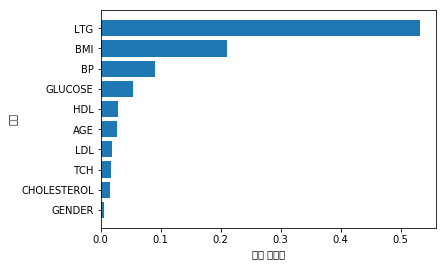

In [55]:
df_importance.sort_values("Importance",ascending = True, inplace = True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [56]:
# p. 207
estimator = RFR(random_state=2)

param_grid = {"n_estimators":para_n_tree,"max_depth":para_depth,"min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 